### Objective
Develop a multiple linear regression model to predict the probability of being accepted for graduate school

Independent variable X:
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)

Dependent variable Y:
- Chance of Admit (ranging from 0 to 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

### Data Understanding

In [2]:
admission = pd.read_csv("E:\\Bagas's File\\Data Science Bagas\\Material\\ML Regression Course Package\\6. Multiple Linear Regression\\Admission.csv")

In [3]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
admission.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Admission Chance,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [7]:
display(admission.shape, admission.columns)

(400, 9)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admission Chance'],
      dtype='object')

In [8]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

In [9]:
admission.duplicated().sum()

0

### Visualize the Data

In [10]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
          'CGPA', 'Research', 'Admission Chance']

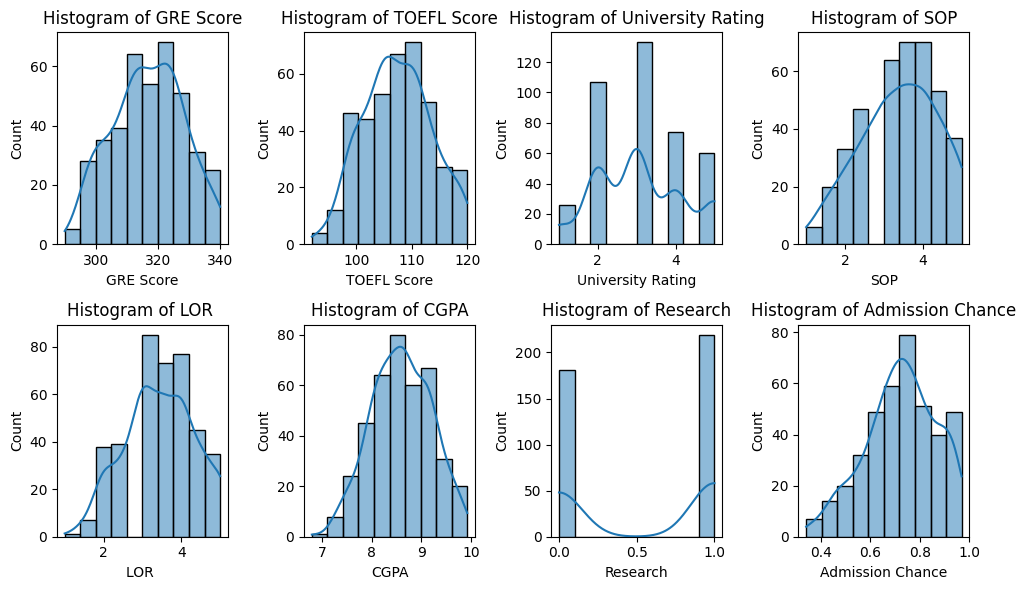

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=admission[column],ax=axes[i], bins=10, kde=True)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

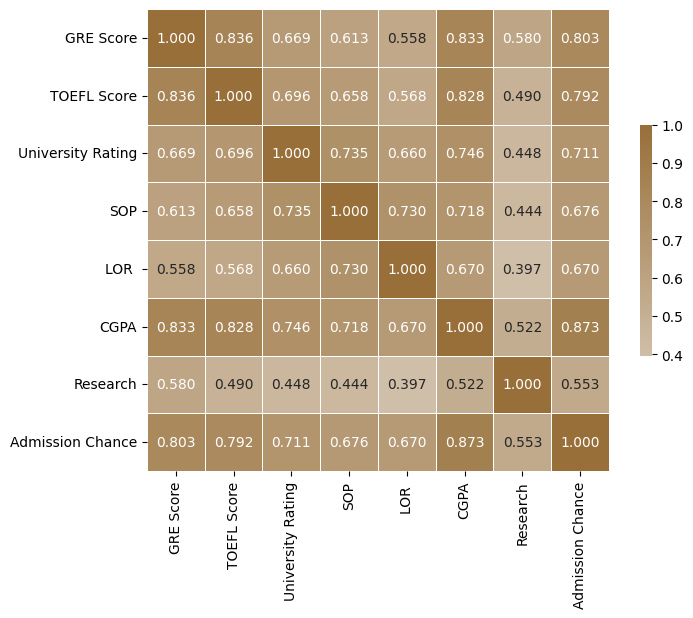

In [12]:
plt.figure(figsize=(8, 6))
correlation = admission[columns].corr()
c_maps = sns.diverging_palette(230, 50, as_cmap=True)
correlation_map = sns.heatmap(correlation, cmap=c_maps, vmax=None, center=0, square=True, linewidth=0.5 ,cbar_kws={"shrink":0.5}, annot=True, fmt='0.3f')

<Figure size 1000x800 with 0 Axes>

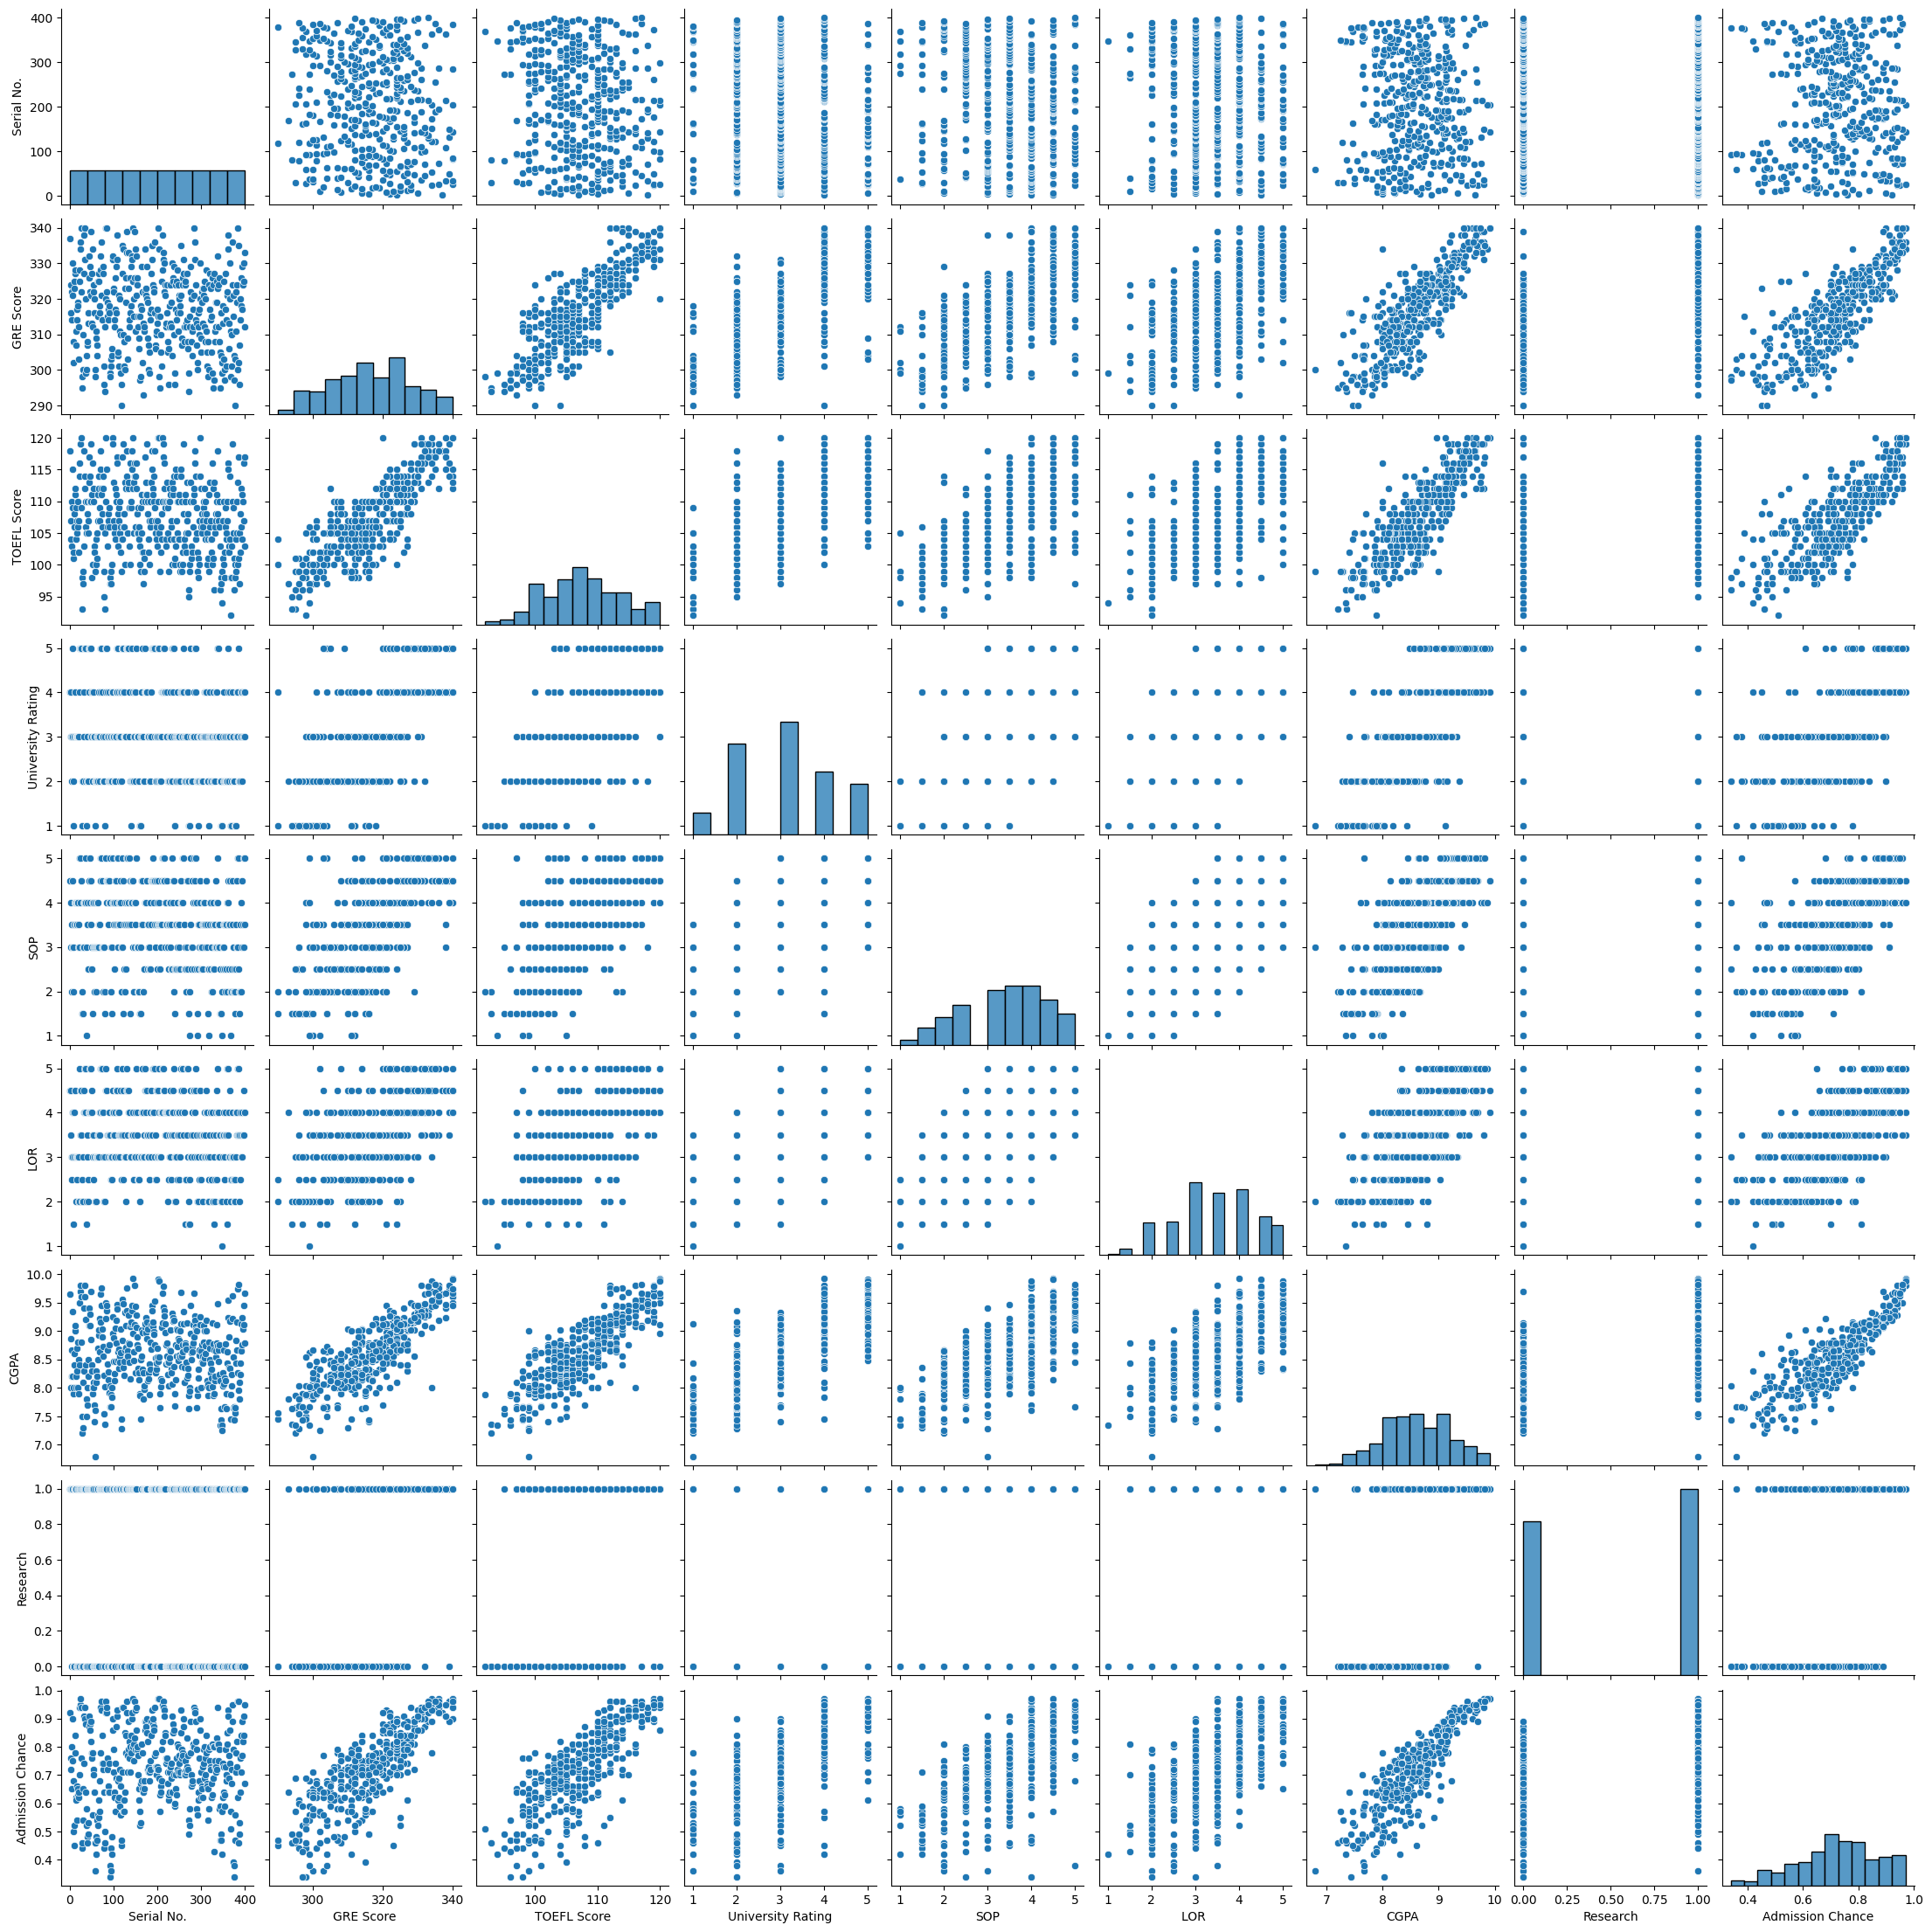

In [13]:
plt.figure(figsize=(10,8))
sns.pairplot(data=admission)
plt.show()

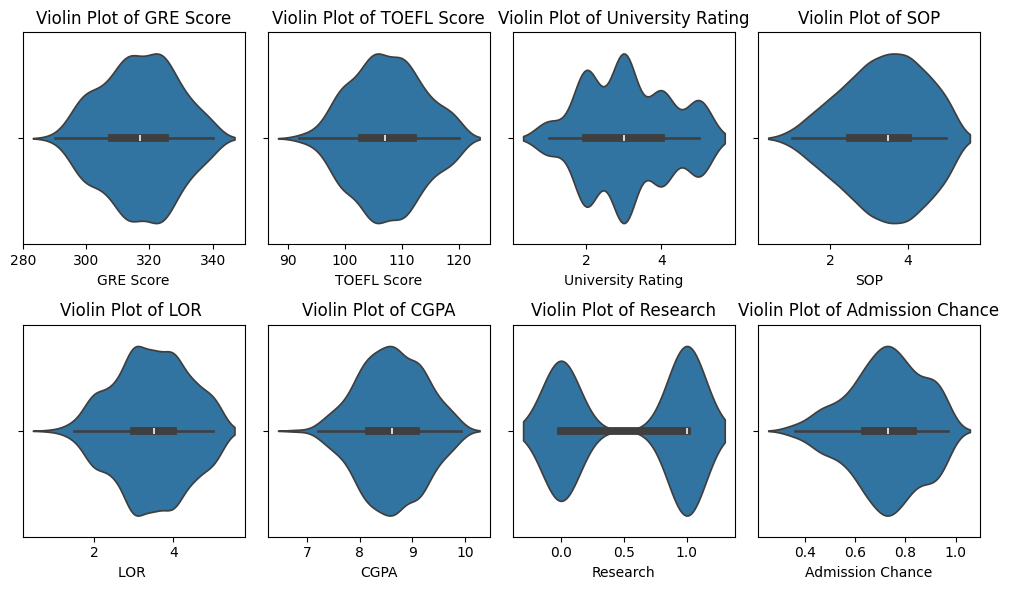

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.violinplot(x=admission[column], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()

### Create Training and Testing Set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
admission = admission.drop('Serial No.', axis=1)
X = admission.drop('Admission Chance', axis=1)
y = admission['Admission Chance']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
display(X_train.head(), y_train.head(), X_test.head(), y_test.head())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0


3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
Name: Admission Chance, dtype: float64

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1


209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Admission Chance, dtype: float64

In [19]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(320, 7)

(320,)

(80, 7)

(80,)

### Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
coeff_df = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['Coefficient'])
coeff_df.loc['Intercept'] = lr.intercept_
coeff_df

,Coefficient
GRE Score,0.001863
TOEFL Score,0.002724
University Rating,0.007377
SOP,-0.000293
LOR,0.015770
CGPA,0.114669
Research,0.022227
Intercept,-1.230234


In [23]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [24]:
coeff_df2 = pd.DataFrame(lr2.coef_, index=X_train.columns, columns=['Coefficient'])
coeff_df2.loc['Intercept'] = lr2.intercept_
coeff_df2

,Coefficient
GRE Score,-0.002607
TOEFL Score,0.002558
University Rating,0.020725
SOP,0.004261
LOR,0.015216
CGPA,0.130100
Research,0.054630
Intercept,0.000000


### Evaluating the Model

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [26]:
y_predict_train = lr.predict(X_train)
y_predict_test = lr.predict(X_test)

Text(0.5, 0, 'True Value')

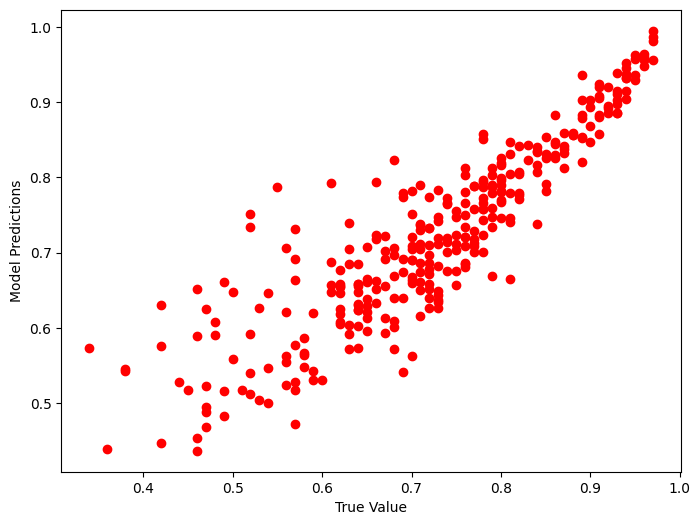

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_predict_train, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value')

Text(0.5, 0, 'True Value')

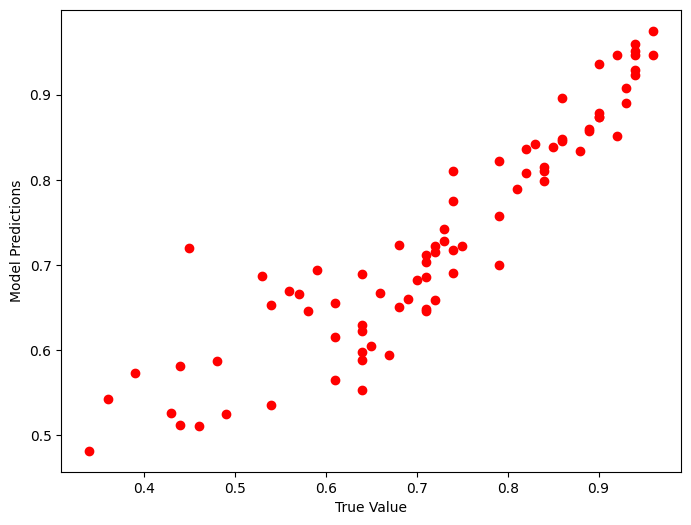

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict_test, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value')

In [29]:
r2 = r2_score(y_train, y_predict_train)
mae = mean_absolute_error(y_train, y_predict_train)
mse = mean_squared_error(y_train, y_predict_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, y_predict_train)
n = len(y_train)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.7951946003191085
Mean Absolute Error: 0.04388752247366184
Mean Squared Error: 0.0038704218434173236
Root Mean Squared Error: 0.062212714483595104
Mean Absolute Percentage Error: 0.06998349319792198
Adjusted R-squared: 0.79059960737755


In [30]:
r2 = r2_score(y_test, y_predict_test)
mae = mean_absolute_error(y_test, y_predict_test)
mse = mean_squared_error(y_test, y_predict_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_predict_test)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.8212082591486991
Mean Absolute Error: 0.04795673362091195
Mean Squared Error: 0.004617003377285012
Root Mean Squared Error: 0.06794853476922819
Mean Absolute Percentage Error: 0.08511848732401696
Adjusted R-squared: 0.803825728788156


### Visualize the Model

In [54]:
from mpl_toolkits.mplot3d import Axes3D

#### On Training Set

#### Using GRE Score, TOEFL Score, and Means of the rest of X

In [55]:
X_means = X_train.mean()
X_constant = X_means.drop(['GRE Score', 'TOEFL Score']).to_dict()
x_surf, y_surf = np.meshgrid(np.linspace(X_train['GRE Score'].min(), X_train['GRE Score'].max(), 100), np.linspace(X_train['TOEFL Score'].min(), X_train['TOEFL Score'].max(), 100))

In [56]:
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score': y_surf.ravel()})

In [57]:
for feature, value in X_constant.items():
    onlyX[feature] = value

In [58]:
fittedY = lr.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

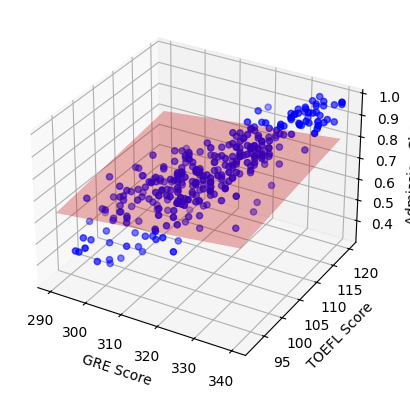

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['GRE Score'], X_train['TOEFL Score'], y_train, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
plt.show()

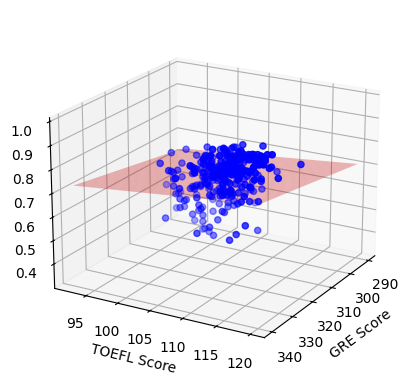

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['GRE Score'], X_train['TOEFL Score'], y_train, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(20,30)
plt.show()

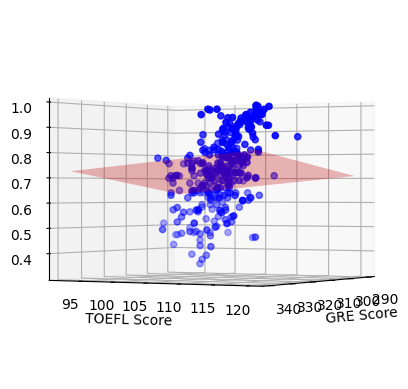

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['GRE Score'], X_train['TOEFL Score'], y_train, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(0,30)
plt.show()

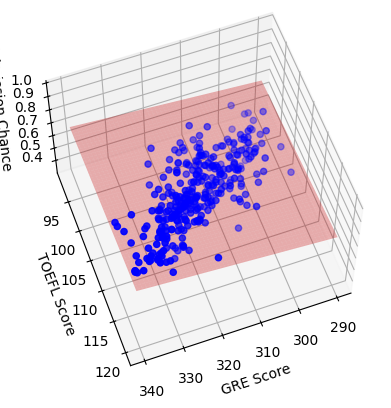

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['GRE Score'], X_train['TOEFL Score'], y_train, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(60,70)
plt.show()

#### On Test Set

#### Using GRE Score, TOEFL Score, and Means of the rest of X

In [69]:
X_means = X_test.mean()
X_constant = X_means.drop(['GRE Score', 'TOEFL Score']).to_dict()
x_surf, y_surf = np.meshgrid(np.linspace(X_test['GRE Score'].min(), X_test['GRE Score'].max(), 100), np.linspace(X_test['TOEFL Score'].min(), X_test['TOEFL Score'].max(), 100))

In [70]:
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score': y_surf.ravel()})

In [71]:
for feature, value in X_constant.items():
    onlyX[feature] = value

In [72]:
fittedY = lr.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

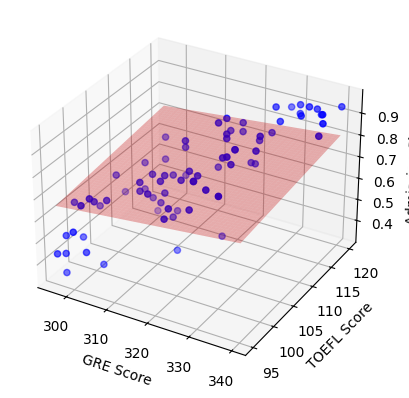

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['GRE Score'], X_test['TOEFL Score'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
plt.show()

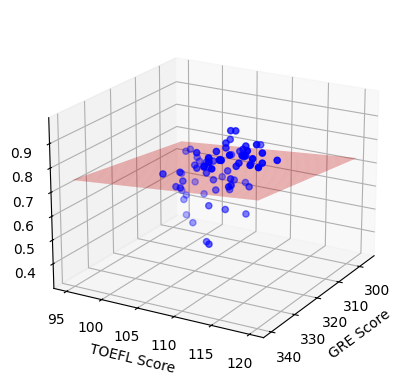

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['GRE Score'], X_test['TOEFL Score'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(20,30)
plt.show()

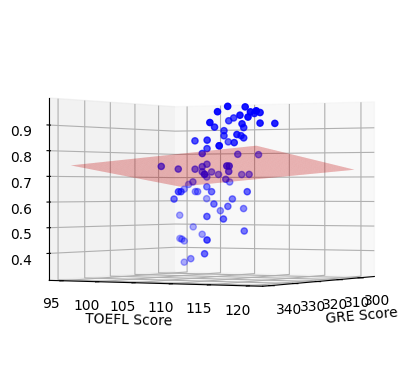

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['GRE Score'], X_test['TOEFL Score'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(0,30)
plt.show()

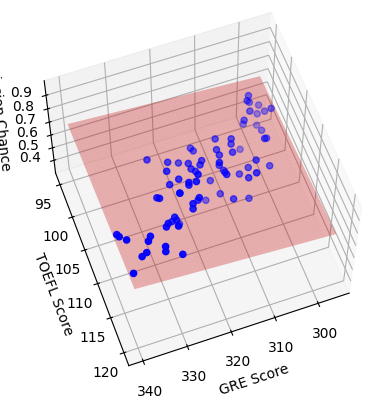

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['GRE Score'], X_test['TOEFL Score'], y_test, color='blue', marker='o', label='Actual')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3, label='Prediction Surface')
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Admission Chance')
ax.view_init(60,70)
plt.show()